# SUPERVISED MACHINE LEARNING PROJECT (Simple Linear Regression)
Predict the percentage of an student based on the number of study hours.

In this prject we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves only one input variable i.e no. of hours studied.

# **Submitted By:** Ritesh Singh

---



---



# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
df = pd.read_csv("http://bit.ly/w-data")

# Data Overview

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.shape

(25, 2)

# EDA

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [11]:
df.duplicated().sum()

0

# Define target (y) and features (X)
# Preparing the data

In [12]:
y= df["Scores"]
x= df[["Hours"]]

In [13]:
df.shape

(25, 2)

In [14]:
x.shape

(25, 1)

In [15]:
y.shape

(25,)

# Model Building

# Using Train-Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=2)

In [18]:
x_train

,Hours
9,2.7
3,8.5
16,2.5
12,4.5
22,3.8
4,3.5
10,7.7
5,1.5
19,7.4
1,5.1


In [19]:
x_test

,Hours
14,1.1
0,2.5
17,1.9
6,9.2
23,6.9


In [20]:
y_train

9     25
3     75
16    30
12    41
22    35
4     30
10    85
5     20
19    69
1     47
2     27
7     60
21    54
20    30
18    67
11    62
24    86
13    42
15    95
8     81
Name: Scores, dtype: int64

In [21]:
y_test

14    17
0     21
17    24
6     88
23    76
Name: Scores, dtype: int64

In [22]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((20, 1), (5, 1), (20,), (5,))

# Model Selection

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
mod=LinearRegression()

# Train and fit model

In [25]:
mod.fit(x_train,y_train)

LinearRegression()

In [26]:
print("Model has been trained.")

Model has been trained.


# Model Interpretation

In [27]:
mod.intercept_

1.5079104828268939

In [28]:
mod.coef_

array([9.94061514])

In [29]:
mod.score(x_test,y_test)

0.9735538080811826

In [30]:
#Predict model
y_pred = mod.predict(x_test)

In [31]:
y_pred

array([12.44258714, 26.35944834, 20.39507925, 92.9615698 , 70.09815497])

In [32]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
14,17,12.442587
0,21,26.359448
17,24,20.395079
6,88,92.961570
23,76,70.098155


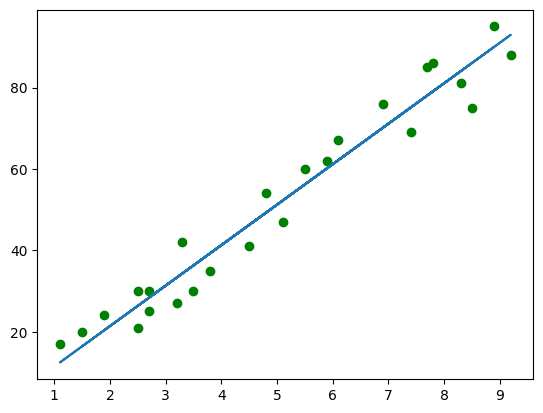

In [33]:
# Plotting the regression line
# y= mx+c
line = mod.coef_*x+mod.intercept_

# Plotting for the test data
plt.scatter(x, y,color= 'green')
plt.plot(x, line);
plt.show()

# Model Evaluation / Accuracy


In [34]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, r2_score


In [35]:
mean_absolute_error(y_test,y_pred)

4.877039354964476

In [36]:
mean_absolute_percentage_error(y_test,y_pred)

0.16150745936804844

In [37]:
mean_squared_error(y_test,y_pred)

24.387620339856596

In [38]:
r2_score(y_test,y_pred)

0.9735538080811826

What will be the predicted score if a student studies for 9.25 hrs/day?

---



---



In [39]:
p= np.array(9.25).reshape(1,1)

In [40]:
mod.predict(p)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93.45860056])